# Машинное обучение, ВМК МГУ

## Практическое задание 3. Метод опорных векторов и логистическая регрессия

### Общая информация

Дата выдачи: 5 ноября 2021

Мягкий дедлайн: 23:59MSK 19 ноября 2021 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 26 ноября 2021.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — **10 баллов + 4.8 бонусов**.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. **Не нужно** удалять и видоизменять написанный код и текст, если явно не указана такая возможность. Создавать новые ячейки с кодом/текстов там, где это осмысленно и вы считаете необходимым, конечно, можно. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде/как результат вывода ячейки. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.3 баллов за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

In [3]:
%pylab inline
import pandas as pd

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

## Часть 1. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [3]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)



__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [4]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

In [5]:
svm = LinearSVC()
clf = CalibratedClassifierCV(svm)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


CalibratedClassifierCV(base_estimator=LinearSVC())

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

**Замечания**

* Обратите внимание, что ROC/PR-curve строится по предсказанным вероятностям (а не бинаризованым меткам ответов)
* Соответственно ROC/PR-AUC так же считается по предсказанным вероятностям

In [6]:
from sklearn import metrics

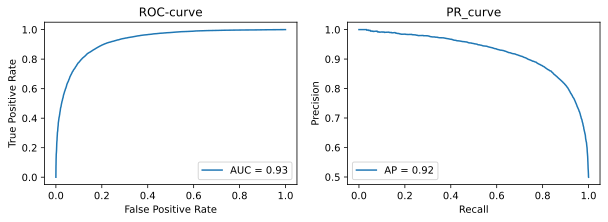

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.set_title('ROC-curve')
ax2.set_title('PR_curve')


predictions = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=ax1)



precision, recall, thresholds = metrics.precision_recall_curve(y_test, predictions)
display = metrics.PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=metrics.average_precision_score(y_test, predictions))
display.plot(ax=ax2)


plt.show()

In [8]:
print('ROC-AUC score: ', metrics.roc_auc_score(y_test, predictions))
print('PR_AP score: ', metrics.average_precision_score(y_test, predictions))

ROC-AUC score:  0.9257087498819326
PR_AP score:  0.9232261613007267


В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

In [9]:
X, y = make_classification(
    n_samples=600, n_features=2, n_informative=2, n_redundant=0,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.svm import SVC

In [11]:
model = SVC(kernel='linear', decision_function_shape='ovr')
model.fit(X_train, y_train)

SVC(kernel='linear')

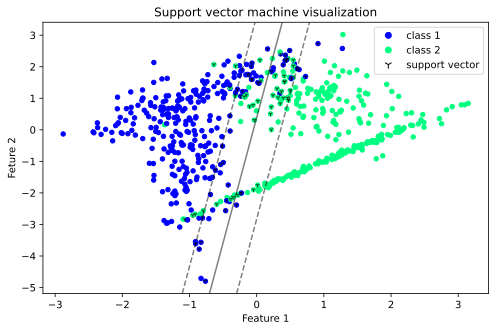

In [12]:
from matplotlib.lines import Line2D

plt.figure(figsize=(8, 5))
plt.title('Support vector machine visualization')

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)



scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='winter')
cross = plt.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=20, linewidth=1, color='black', alpha=0.7, marker="1", label='support')

plot_svc_decision_function(model)
plt.xlabel('Feature 1')
plt.ylabel('Feture 2')

handles, labels = scatter.legend_elements()

handles.append(Line2D([], [], color='black', marker='1', linestyle='None',
                          markersize=8, label='Purple triangles'))
legend = plt.legend(handles, ['class 1', 'class 2', 'support vector'])


plt.show()

часть кода [отсюда](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. 

* Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [13]:
def plot_calibration_curve(y_test, preds):
    """
    preds --- array of probabilities
    """
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((r + l) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))

    plt.plot(bin_middle_points, bin_real_ratios)

* **(?)** Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?


**Замечания**
* Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.
* Для нормировки в [0,1] decision_function используйте MinMaxScaler
* Не используйте параметр probability=True при обучении SVM -- этот параметр неявно запускает калибровку предсказания https://scikit-learn.org/stable/modules/svm.html#scores-probabilities

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
from sklearn.svm import SVC

In [16]:
X, y = make_classification(
    n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [17]:
model = SVC(kernel='linear', decision_function_shape='ovr')
model.fit(X_train, y_train)

SVC(kernel='linear')

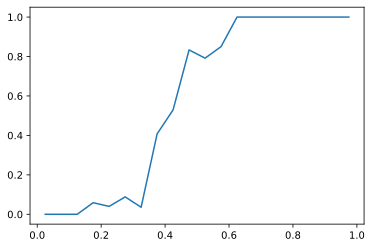

In [18]:
scaler = MinMaxScaler()
data = model.decision_function(X_test)
scaler.fit(data.reshape(-1, 1))
transformed_data = scaler.transform(data.reshape(-1, 1))
  
plot_calibration_curve(y_test, transformed_data.reshape(data.shape[0],))

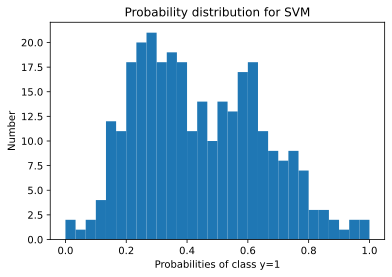

In [19]:
plt.title('Probability distribution for SVM')

plt.hist(transformed_data.reshape(data.shape[0],), bins=30)

plt.xlabel('Probabilities of class y=1')
plt.ylabel('Number')


plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression

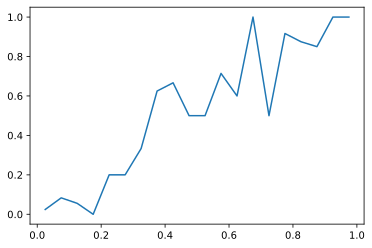

In [21]:
clf = LogisticRegression().fit(X_train, y_train)

data = clf.predict_proba(X_test)
  
plot_calibration_curve(y_test, data[:, 1])

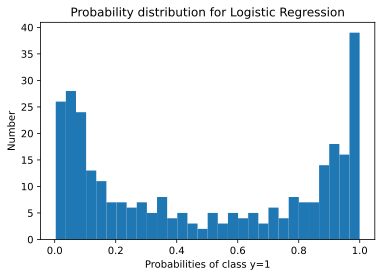

In [22]:
plt.title('Probability distribution for Logistic Regression')

plt.hist(data[:, 1], bins=30)

plt.xlabel('Probabilities of class y=1')
plt.ylabel('Number')


plt.show()

**Ответ:** в логистической регрессии сильно меньше руезультатов близких к 0.5, значения сконцентрированы около окресностей 0 и 1, то есть она сильнее уверена в своих ответах. Это связано с тем, что логическая регрессия максимизирует отсуп даже если он и так большой, а в методе опорных векторов модель не трогает не опорные вектора, то есть вероятность класса 1 может оставаться близкой к 0.5, т.к. разделяющая прямая может проходить близко к точкам из тестовой выборки,и поэтому метод может быть не сильно уверен в пренадлежности их к какому-то классу

**(?)** Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

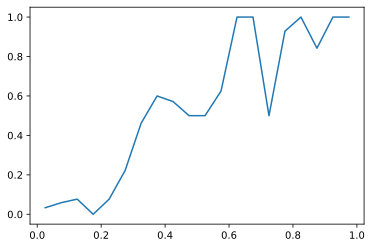

In [23]:
model = SVC(kernel='linear', decision_function_shape='ovr')
clf = CalibratedClassifierCV(model)
clf.fit(X_train, y_train)

data = clf.predict_proba(X_test)

plot_calibration_curve(y_test, data[:, 1])

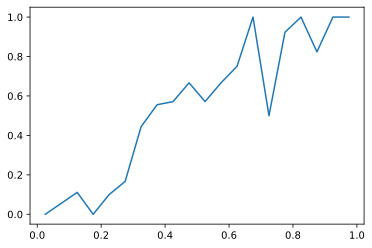

In [24]:
clf = LogisticRegression()
clf = CalibratedClassifierCV(clf).fit(X_train, y_train)
data = clf.predict_proba(X_test)
  
plot_calibration_curve(y_test, data[:, 1])

**Ответ:** Для SVM стало чуть ближе к диагональной идеальной кривой, для логистической регрессии почти что тоже самое

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

In [25]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 2. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(1 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
cd 
/content/drive/MyDrive/cmc/ммро/свм

/content/drive/MyDrive/cmc/ммро/свм


In [30]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [31]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [32]:
clf = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**(?)** Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

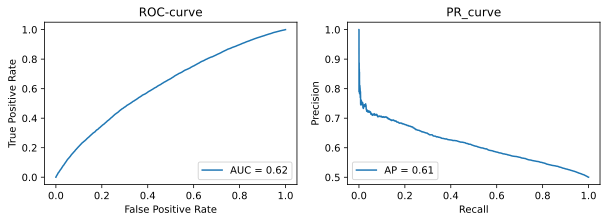

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.set_title('ROC-curve')
ax2.set_title('PR_curve')


predictions = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=ax1)



precision, recall, thresholds = metrics.precision_recall_curve(y_test, predictions)
display = metrics.PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=metrics.average_precision_score(y_test, predictions))
display.plot(ax=ax2)


plt.show()

**Ответ:** ROC кривая почти диагональная, то есть ответы выдаются почти рандомно. На PR кривой резкий скочок вниз сначала, из-за того что берем начальную точку (1, 1), а потом практически линейно убывает. То есть нет долгих участков где увеличивается TP. Средняя точность примерно 0.6, то есть классификатор чуть чаще дает правильные ответы, но ближе к рандомному

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1.5 балла)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

In [34]:
from sklearn.metrics import log_loss

In [24]:
import warnings
warnings.simplefilter("ignore")X

In [75]:
np.linalg.norm([10, 10]) ** 2

200.00000000000003

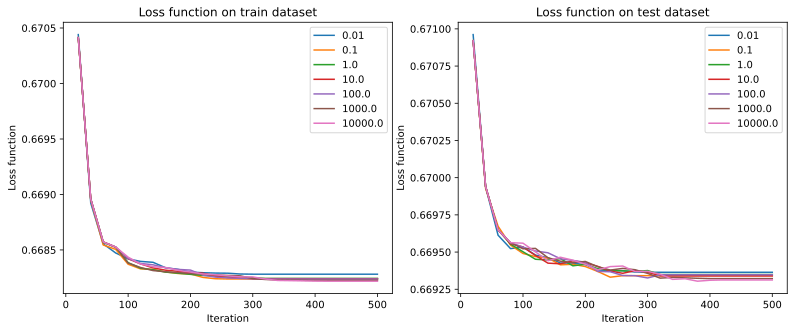

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.set_title('Loss function on train dataset')
ax2.set_title('Loss function on test dataset')

alphas = np.logspace(-2, 4, 7)

for alpha in alphas:
    losses_train = []
    losses_test = []
    clf = LogisticRegression(warm_start=True, C=alpha, max_iter=20)
    for i in range(25):
        clf.fit(X_train, y_train)
        predictions = clf.predict_proba(X_train)
        losses_train.append(log_loss(y_train, predictions))

        predictions = clf.predict_proba(X_test)
        losses_test.append(log_loss(y_test, predictions))
    ax1.plot(np.arange(20, 501, 20), losses_train, label=alpha)
    ax2.plot(np.arange(20, 501, 20), losses_test, label=alpha)

ax1.set_xlabel('Iteration')
ax2.set_xlabel('Iteration')
ax1.set_ylabel('Loss function')
ax2.set_ylabel('Loss function')


ax1.legend()
ax2.legend()
plt.show()

## Часть 3. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [3]:
from sklearn.linear_model import LogisticRegression

In [38]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.3, random_state=42)

In [23]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
predictions = clf.predict_proba(X_test)

In [19]:
predictions

array([[0.95961771, 0.04038229],
       [0.94717231, 0.05282769],
       [0.96383348, 0.03616652],
       ...,
       [0.97469898, 0.02530102],
       [0.98349625, 0.01650375],
       [0.87839125, 0.12160875]])

In [20]:
print('accuracy: ', sum([y_test != clf.predict(X_test)])/y_test.shape[0])

accuracy:  0.03687753410541879


In [22]:
from sklearn import metrics

In [25]:
print('ROC-AUC score: ', metrics.roc_auc_score(y_test, predictions[:, 1]))

ROC-AUC score:  0.6080381085887996


__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [7]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.3, random_state=42)

In [29]:
X_train.head(1)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
977816,7,1,9,1,0,0,0,1,0,0,0,0,0,0,10,1,0,0,0.9,1.6,1.692262,11,0,1,1,1,17,-1,1,2,1,104,2,0.447214,1.550513,0.415812,3.316625,0.7,0.9,0.2,1,3,9,3,10,2,7,5,2,4,10,0,1,1,0,0,1


In [18]:
feature_names = X_train.columns.values.tolist()
X_train.loc[:, [feature for feature in feature_names if 'cat' in feature]].head(1)

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,1,1,0,11,0,1,1,1,17,-1,1,2,1,104


In [10]:
X_train = X_train.set_index(pd.Index(np.arange(X_train.shape[0])))

In [11]:
X_test = X_test.set_index(pd.Index(np.arange(X_test.shape[0])))

In [19]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
categorical_features = [feature for feature in feature_names if 'cat' in feature]

for feature in categorical_features:
    ohe_ftrs = ohe.fit_transform(X_train[feature].values.reshape(-1,1))
    tmp = pd.DataFrame(ohe_ftrs, columns = [feature + str(i) for i in range(ohe_ftrs.shape[1])])
    X_train = pd.concat([X_train, tmp], axis=1)

    ohe_ftrs = ohe.transform(X_test[feature].values.reshape(-1,1))
    tmp = pd.DataFrame(ohe_ftrs, columns = [feature + str(i) for i in range(ohe_ftrs.shape[1])])
    X_test = pd.concat([X_test, tmp], axis=1)

In [25]:
start = time.time()

model = LogisticRegression().fit(X_train, y_train)

print('time: ', time.time() - start, 's')

time:  29.180575609207153 s


In [26]:
predictions = model.predict_proba(X_test)
print('after use OneHotEncoder ROC-AUC score: ', metrics.roc_auc_score(y_test, predictions[:, 1]))

after use OneHotEncoder ROC-AUC score:  0.623855680530789


Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки.

**Замечание (!)**
* При реализации счетчиков необходимо использовать один из методов борьбы с переобучением. В заданиях вам либо говорится, как использовать, либо вы выбираете сами

**(Бонусная часть)** Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 баллa)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Ответ: ... ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ**

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум). 

__(+0.5 балла)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(1 балл)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты.

**(?)** Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ: ... ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ**

## Часть 4. Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [63]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [64]:
X_train = X_train.set_index(pd.Index(np.arange(X_train.shape[0])))

In [65]:
X_test = X_test.set_index(pd.Index(np.arange(X_test.shape[0])))

In [66]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
categorical_features = [feature for feature in feature_names if 'cat' in feature]

for feature in categorical_features:
    ohe_ftrs = ohe.fit_transform(X_train[feature].values.reshape(-1,1))
    tmp = pd.DataFrame(ohe_ftrs, columns = [feature + str(i) for i in range(ohe_ftrs.shape[1])])
    X_train = pd.concat([X_train, tmp], axis=1)

    ohe_ftrs = ohe.transform(X_test[feature].values.reshape(-1,1))
    tmp = pd.DataFrame(ohe_ftrs, columns = [feature + str(i) for i in range(ohe_ftrs.shape[1])])
    X_test = pd.concat([X_test, tmp], axis=1)

In [67]:
X_train.drop(columns=categorical_features)
X_test.drop(columns=categorical_features)

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,...,ps_car_11_cat64,ps_car_11_cat65,ps_car_11_cat66,ps_car_11_cat67,ps_car_11_cat68,ps_car_11_cat69,ps_car_11_cat70,ps_car_11_cat71,ps_car_11_cat72,ps_car_11_cat73,ps_car_11_cat74,ps_car_11_cat75,ps_car_11_cat76,ps_car_11_cat77,ps_car_11_cat78,ps_car_11_cat79,ps_car_11_cat80,ps_car_11_cat81,ps_car_11_cat82,ps_car_11_cat83,ps_car_11_cat84,ps_car_11_cat85,ps_car_11_cat86,ps_car_11_cat87,ps_car_11_cat88,ps_car_11_cat89,ps_car_11_cat90,ps_car_11_cat91,ps_car_11_cat92,ps_car_11_cat93,ps_car_11_cat94,ps_car_11_cat95,ps_car_11_cat96,ps_car_11_cat97,ps_car_11_cat98,ps_car_11_cat99,ps_car_11_cat100,ps_car_11_cat101,ps_car_11_cat102,ps_car_11_cat103
0,4,0,0,1,0,0,0,0,0,0,0,7,0,1,0,0.9,0.9,1.291559,2,0.387298,1.103217,0.336155,3.605551,0.1,0.7,0.4,3,2,9,2,11,1,15,10,2,7,5,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,5,1,0,0,0,0,0,0,0,0,13,0,1,0,0.8,1.0,1.191900,3,0.417971,1.006795,0.365787,3.605551,0.9,0.5,0.5,2,1,7,2,10,1,9,4,3,2,7,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,5,1,0,0,0,0,0,0,0,0,7,1,0,0,0.9,0.7,1.057414,3,0.424264,0.701725,0.412916,2.449490,0.6,0.8,0.5,3,0,6,4,9,1,12,7,4,2,7,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,9,0,0,0,1,0,0,0,0,0,13,1,0,0,0.9,0.9,1.172071,2,0.360555,0.568890,0.376165,1.732051,0.4,0.9,0.1,4,4,8,2,10,1,11,4,1,5,4,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0.3,0.2,-1.000000,0,0.374166,0.631802,0.416653,2.645751,0.0,0.5,0.3,5,2,7,2,10,1,9,5,2,1,7,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119038,0,4,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,2,0.424264,1.109929,0.434971,3.464102,0.3,0.0,0.6,1,3,4,3,8,3,11,7,4,3,5,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119039,1,10,0,1,0,0,0,0,0,0,0,2,0,0,1,0.9,0.6,0.665207,3,0.400000,0.910601,-1.000000,3.464102,0.2,0.1,0.1,2,0,8,2,10,4,7,5,1,3,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119040,1,4,1,0,0,0,0,0,1,0,1,5,1,0,0,0.1,0.2,-1.000000,3,0.399500,0.670867,0.326956,2.236068,0.0,0.3,0.3,3,1,8,2,8,1,8,4,3,1,6,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
119041,1,3,1,0,0,0,0,0,0,0,0,6,1,0,0,0.9,0.8,1.793042,2,0.424264,1.118219,0.400999,3.464102,0.8,0.9,0.1,4,2,7,5,10,3,10,8,3,6,5,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [68]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
predictions = clf.predict_proba(X_test)
print('ROC-AUC score: ', metrics.roc_auc_score(y_test, predictions[:, 1]))

ROC-AUC score:  0.627687306369356


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

**(?)** Изменилось ли качество? Как?

__(0.5 балла)__

In [69]:
indices = (-clf.coef_.flatten()).argsort()[:200]

In [70]:
clf = LogisticRegression()
clf.fit(X_train.iloc[:, indices], y_train)
predictions = clf.predict_proba(X_test.iloc[:, indices])
print('ROC-AUC score: ', metrics.roc_auc_score(y_test, predictions[:, 1]))

ROC-AUC score:  0.6081093326596004


**Ответ:** Качество стало хуже, чем до удаление признаков

**(?)** А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_names = X_train.columns.values.tolist()
numeric_features = [feature for feature in feature_names if 'cat' not in feature]
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

indices = (-clf.coef_.flatten()).argsort()[:200]

clf = LogisticRegression()
clf.fit(X_train.iloc[:, indices], y_train)
predictions = clf.predict_proba(X_test.iloc[:, indices])
print('ROC-AUC score: ', metrics.roc_auc_score(y_test, predictions[:, 1]))

ROC-AUC score:  0.6109121336034242


**Ответ:** все равно качество упало, но не так сильно как без масштабирования

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случае.

__(0.5 балла)__

In [89]:
start = time.time()

X_train_positive = X_train[y_train == 1]
X_train_negative = X_train[y_train == 0]
n_positive = X_train_positive.shape[0]
n_negative = X_train_negative.shape[0]

t_statistic = abs(X_train_positive.mean() - X_train_negative.mean()) / ((n_positive * X_train_positive.std() ** 2 + n_negative * X_train_negative.std() ** 2) / (n_positive + n_negative)) ** (1/2)

indices = (-t_statistic).argsort()[:200]
print('time: ', time.time() - start, 's')

clf = LogisticRegression()
clf.fit(X_train.iloc[:, indices], y_train)
predictions = clf.predict_proba(X_test.iloc[:, indices])
print('ROC-AUC score: ', metrics.roc_auc_score(y_test, predictions[:, 1]))

time:  0.8673105239868164 s
ROC-AUC score:  0.6273065140362192


### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлемо. 

**Напишите функцию, которая отбирает признаки вышеприведенным способом (использовать готовые решения аналогичных библиотечных функций нельзя)**

**Замечание**
* Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**(?)** Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ: ... ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ**

## Часть 5. Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [5]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

**Задание 11 (0.5 балла)**

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

**(?)** Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [6]:
target[target > 0].shape[0] / target.shape[0]

0.036447517859182946

**Ответ:** Потому что очень редко приходится обращаться в страховую

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [7]:
X_train = X_train.set_index(pd.Index(np.arange(X_train.shape[0])))
X_test = X_test.set_index(pd.Index(np.arange(X_test.shape[0])))

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
feature_names = X_train.columns.values.tolist()
categorical_features = [feature for feature in feature_names if 'cat' in feature]

for feature in categorical_features:
    ohe_ftrs = ohe.fit_transform(X_train[feature].values.reshape(-1,1))
    tmp = pd.DataFrame(ohe_ftrs, columns = [feature + str(i) for i in range(ohe_ftrs.shape[1])])
    X_train = pd.concat([X_train, tmp], axis=1)

    ohe_ftrs = ohe.transform(X_test[feature].values.reshape(-1,1))
    tmp = pd.DataFrame(ohe_ftrs, columns = [feature + str(i) for i in range(ohe_ftrs.shape[1])])
    X_test = pd.concat([X_test, tmp], axis=1)

X_train = X_train.drop(columns=categorical_features)
X_test = X_test.drop(columns=categorical_features)

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
predictions = clf.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**(?)** Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [11]:
from sklearn import metrics
print('ROC-AUC score: ', metrics.roc_auc_score(y_test, predictions[:, 1]))

ROC-AUC score:  0.6364451467457948


**Ответ:** Потому что очень сильно не сбалансированная выборка, и очень легко ошибиться предсказав класс 0

**(?)** Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

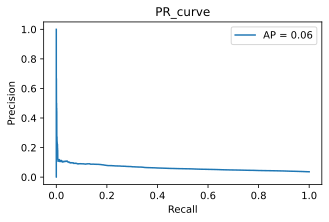

In [16]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 3))

ax1.set_title('PR_curve')

precision, recall, thresholds = metrics.precision_recall_curve(y_test, predictions[:, 1])
display = metrics.PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=metrics.average_precision_score(y_test, predictions[:, 1]))
display.plot(ax=ax1)
ax1.legend(loc='upper right')

plt.show()

precision очень медленно убывает со значения 0.1 до значения 0 примерно. PR кривая почти линейная после окончания начальных колебаний.

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 12.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем (т.е доля тех клиентов (среди всех клиентов тестовой выборки), которых мы пометили единичками, но у которых на самом деле был 0 в y_test)?

**Замечание-подсказка (!)**
* Порог нужно искать по precision

In [ ]:
predictions = predictions[:, 1]

In [35]:
indecies = predictions.argsort()

sorted_predictions = predictions.argsort()
sorted_y_test = y_test[indecies]

precision = 1
treshold = 10
while precision > 0.05:
    precision = len([sorted_y_test[:treshold] == 1]) / treshold
    treshold += 1

In [36]:
treshold

21

In [37]:
print('precision', len([sorted_y_test[:treshold] == 1]) / treshold , 'recall', len([sorted_y_test[:treshold] == 1]) / (len([sorted_y_test[treshold:] == 1]) + len([sorted_y_test[:treshold] == 1])))

precision 0.047619047619047616 recall 0.5


In [38]:
print('Доля потенциальных клиентов, которым откажем:', len([sorted_y_test[:treshold] == 0]) / y_test.shape[0])

Доля потенциальных клиентов, которым откажем: 8.400325932646187e-06


Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги (читай: y_pred_i = 1, y_test_i = 1), и те, кто не обратился бы, то есть принёс бы нам деньги (читай: y_pred_i = 1, y_test_i = 0). Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной.  

__Задание 13.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. 

__(0.5 баллa)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**(?)** А на каком значении порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 6 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 1 БАЛЛ НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 14.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(1 балл)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1.5 баллa)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ